In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [16]:
nPerClust = 100
blur = 1

A = [1,3]
B = [1,-2]

a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()


In [17]:
def createANNModel(learningRate):
  class ANNqwerty(nn.Module):
    def __init__(self):
      super().__init__()
      self.input = nn.Linear(2,16)
      self.hidden = nn.Linear(16,1)
      self.output = nn.Linear(1,1)

    def forward(self,x):
      x = self.input(x)
      x = F.relu(x)

      x = self.hidden(x)
      x = F.relu(x)

      x = self.output(x)
      x= torch.sigmoid(x)

      return x
  ANNClassify = ANNqwerty()

  lossfun = nn.BCELoss()

  optimizer = torch.optim.SGD(ANNClassify.parameters(), lr=learningRate)

  return ANNClassify, lossfun, optimizer


In [18]:
epochs = 1000

def trainModel(model):
  losses = torch.zeros(epochs)

  for i in range(epochs):
    yHat = model(data)

    loss = lossfun(yHat,labels)
    losses[i] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  preds = model(data)

  totalacc = torch.mean(((preds>.5) == labels).float())*100

  return losses, preds, totalacc


In [19]:
ANNClassify, lossfun, optimizer = createANNModel(0.01)

losses, preds, totalacc = trainModel(ANNClassify)

print("acc is %g%%" %totalacc)

acc is 99.5%


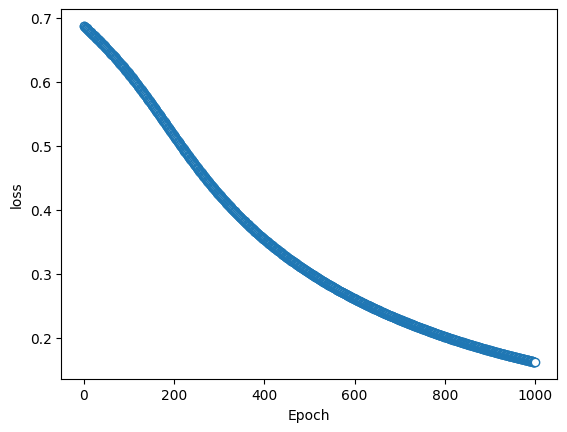

In [26]:
plt.plot(losses.detach(),'o', markerfacecolor='w', linewidth=.1 )
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()